In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

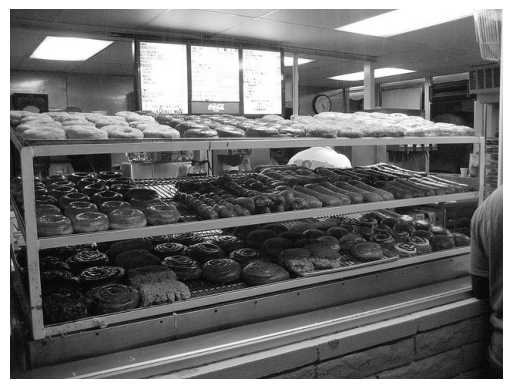

In [2]:
img = Image.open(Path.cwd() / "images/real/0001.jpg").convert("L")
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [3]:
def calc_radial_prof(arr):    
    # Calculate radial distances from the image centre
    h, w = arr.shape
    rows, cols = np.indices((h, w))
    cy = (h - 1) / 2
    cx = (w - 1) / 2
    radial_dists = np.sqrt((rows - cy)**2 + (cols - cx)**2)
    r = radial_dists.astype(int)

    # Calculate sum of pixel values at a certain radius and divide by number of bins at that radius
    sum_bins = np.bincount(r.ravel(), weights=arr.ravel())
    num_bins = np.bincount(r.ravel())
    radial_prof = sum_bins / num_bins

    return radial_prof

https://www.mdpi.com/2078-2489/15/11/711

In [4]:
def calc_magnitude_spect(img):
    img_arr = np.array(img)

    # 2D FFT
    fft = np.fft.fft2(img_arr)
    fft_shifted = np.fft.fftshift(fft)  # Move zero frequency to center

    # Magnitude spectrum
    magnitude = np.abs(fft_shifted)
    magnitude_log = np.log1p(magnitude)  # log scale for visibility

    return magnitude_log

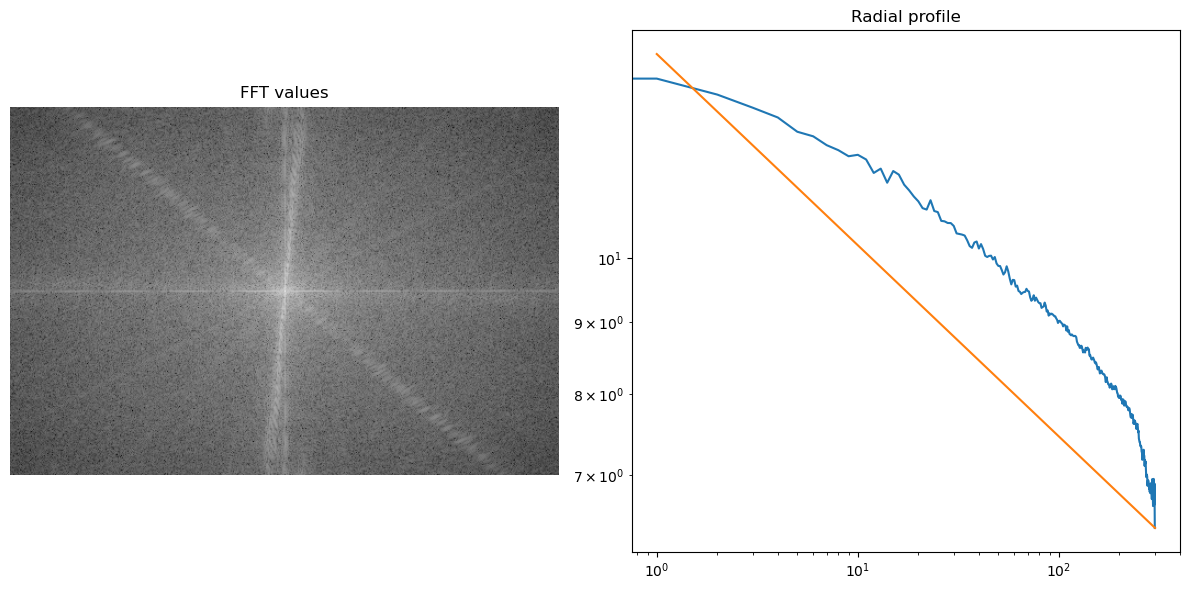

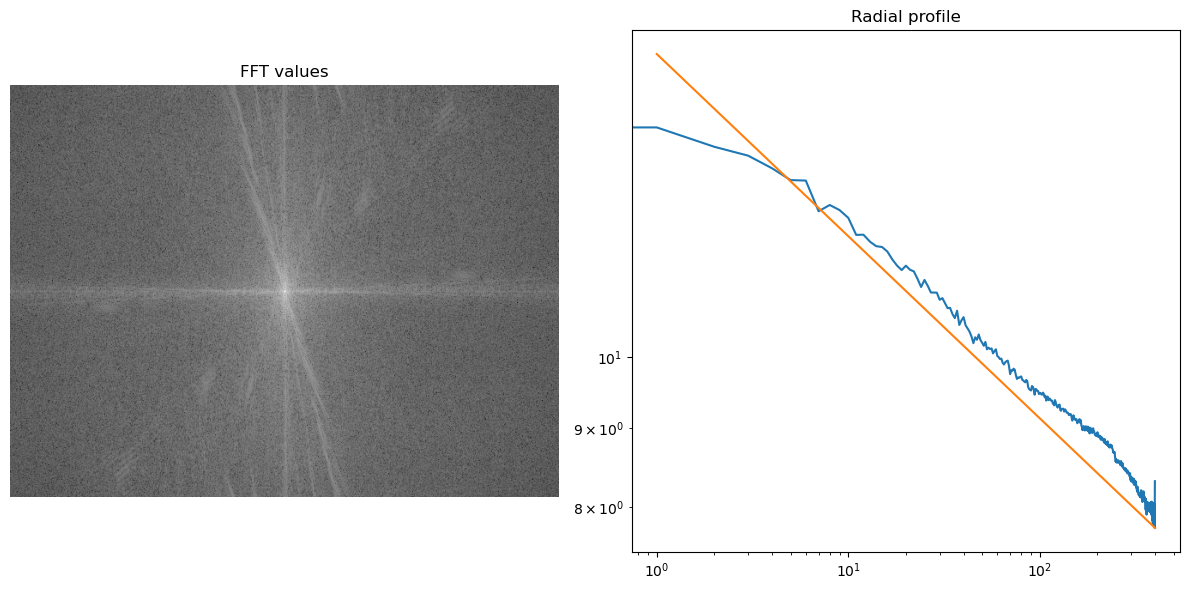

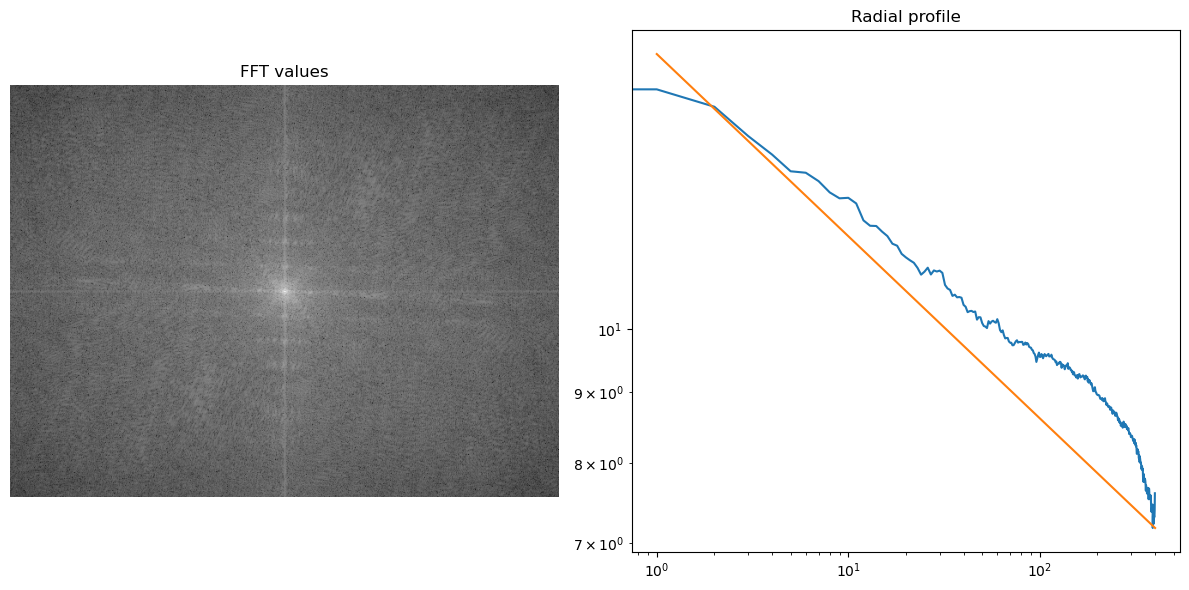

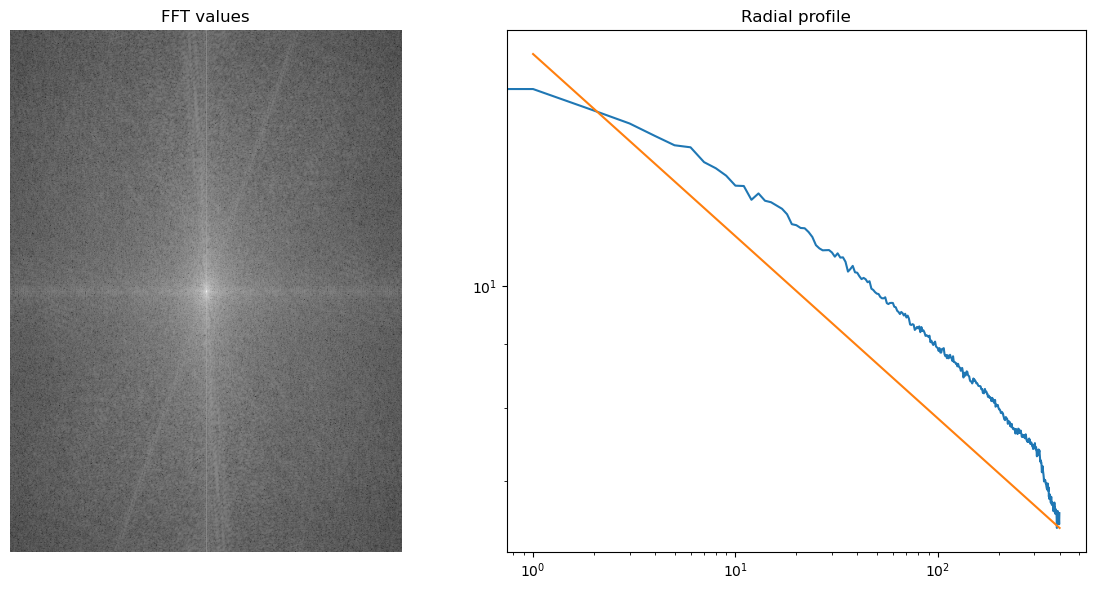

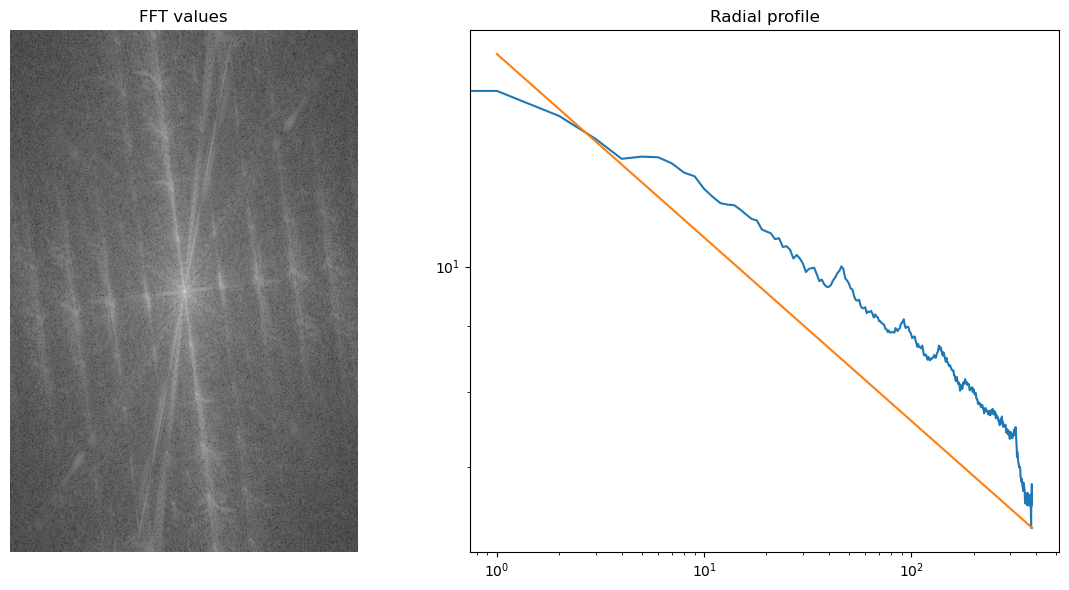

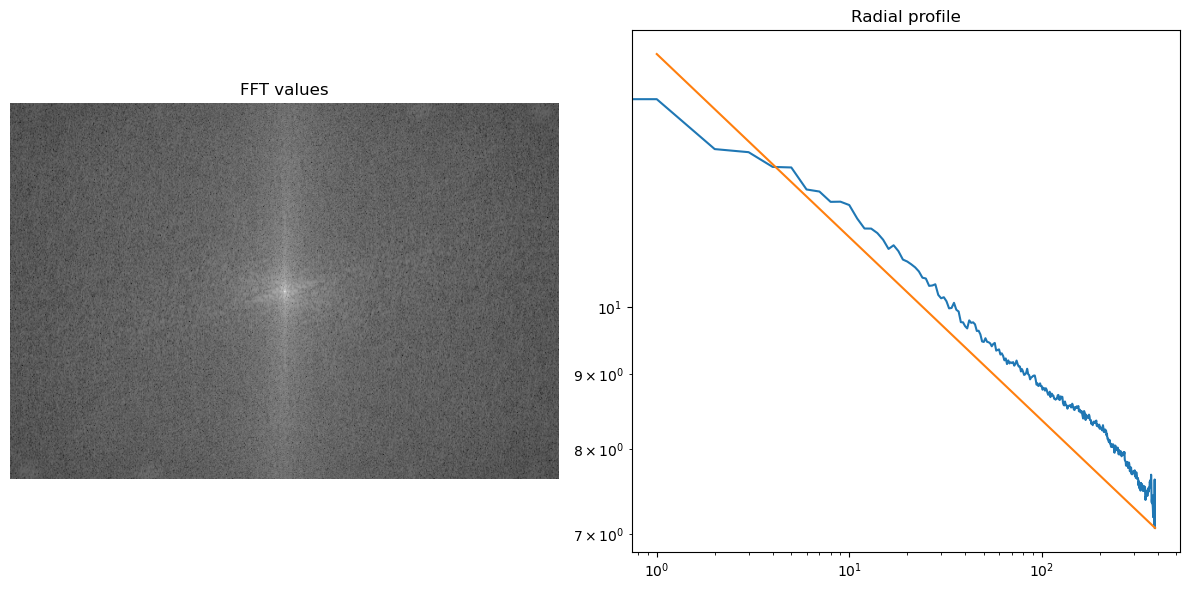

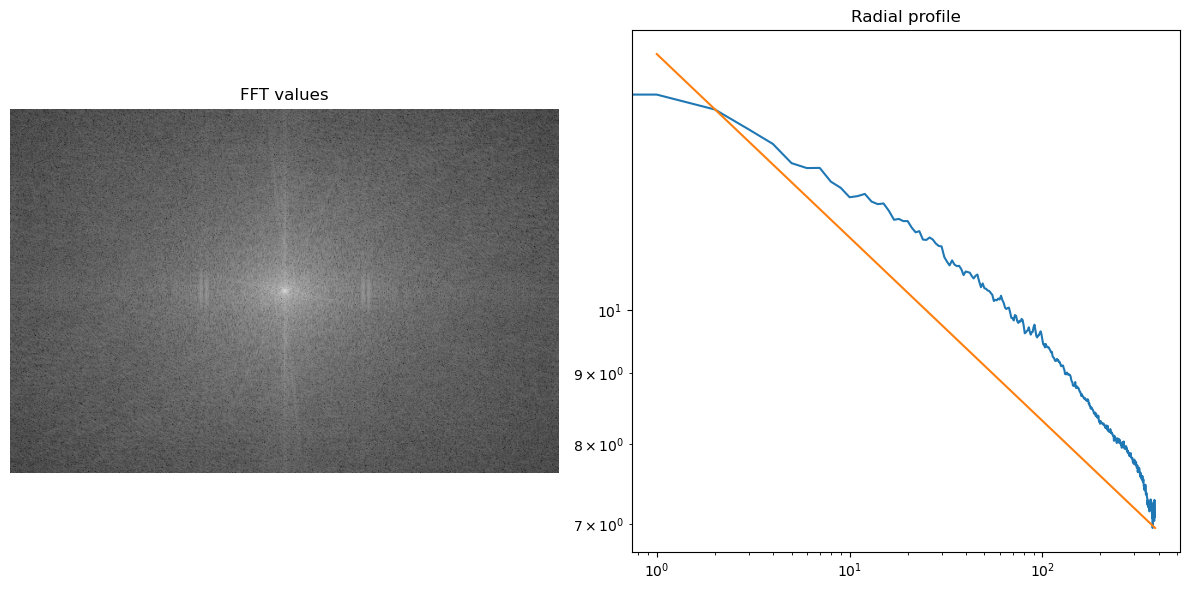

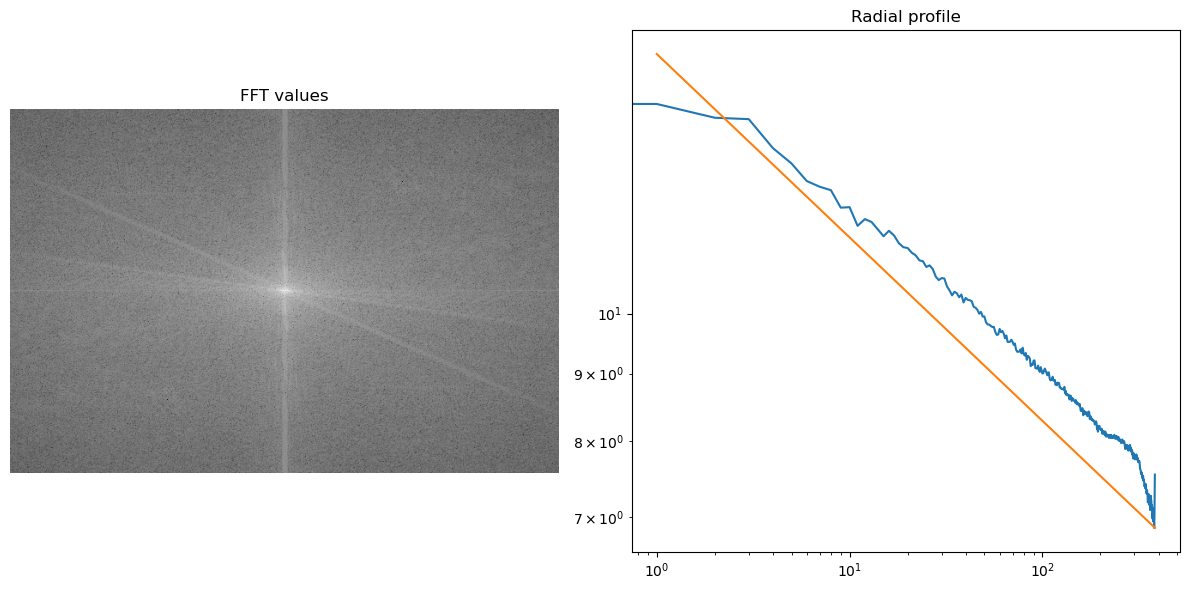

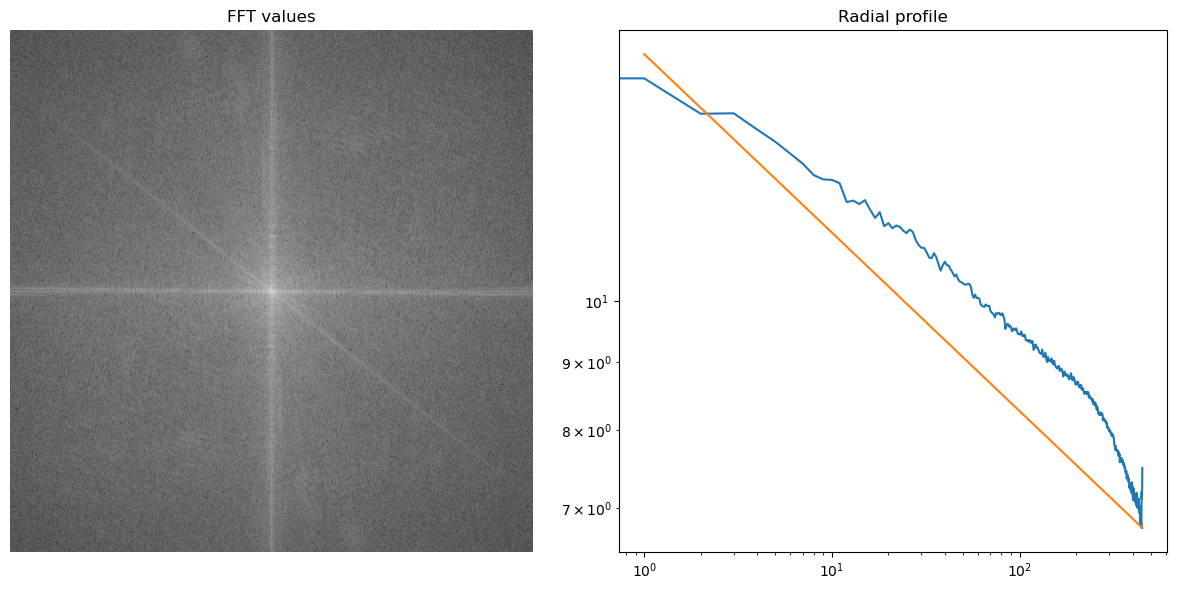

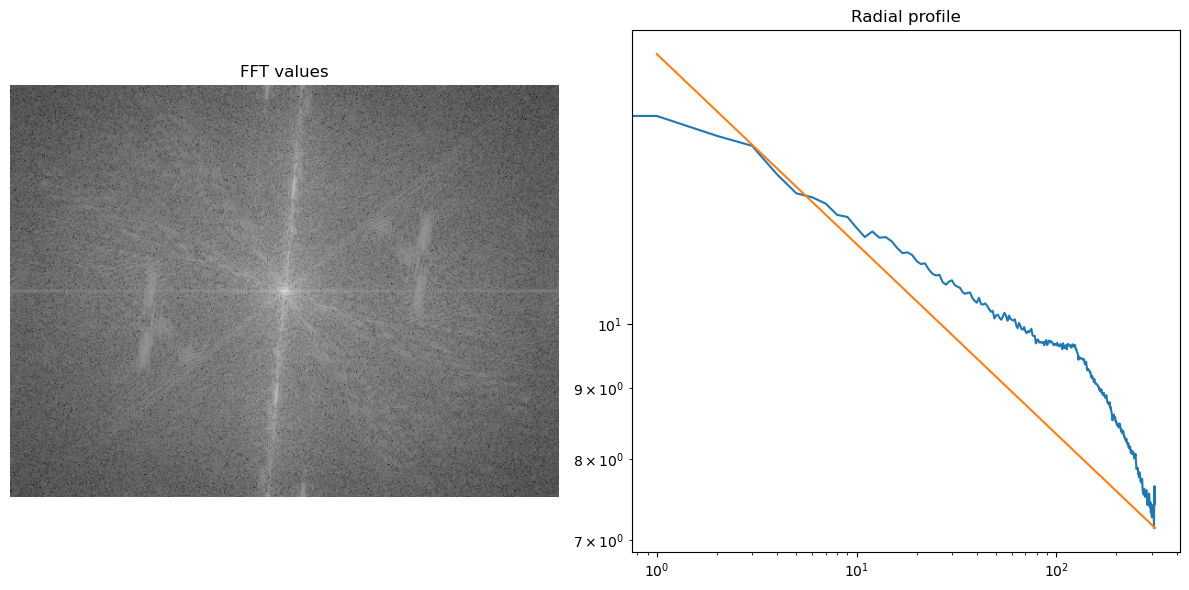

In [5]:
# Load greyscale image
for i in range(10):

    img_real = Image.open(fPath.cwd() / "images/real/000{i}.jpg").convert("L")
    img_gen = Image.open(fPath.cwd() / "images/gen/000{i}.jpg").convert("L")
    magnitude_log_real = calc_magnitude_spect(img_real)
    magnitude_log_gen = calc_magnitude_spect(img_gen)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # first plot
    axes[0].imshow(magnitude_log_real, cmap="gray", aspect="equal")
    axes[0].axis("off")
    axes[0].set_title("FFT values")

    # second plot
    radial_prof = calc_radial_prof(magnitude_log_real)
    axes[1].plot(radial_prof)
    # axes[1].axis("off")
    axes[1].set_title("Radial profile")


    # Comparison line
    axes[1].loglog([1, len(radial_prof)], [np.max(radial_prof), np.min(radial_prof)])

    axes[1].set_yscale("log")
    axes[1].set_xscale("log")


    plt.tight_layout()
    plt.show()